<b>Auto MPG Data Set</b>

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)



<b>Attribute Information:</b>

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Dataset: http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/

<b>Importing Necessary Libraries</b>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [58]:
columns_names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
auto_d= pd.read_csv("auto-mpg.data.csv", delim_whitespace=True, names=columns_names)
auto_d.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [59]:
auto_d.shape

(398, 9)

<b>Observations:</b>
There are 398 rows and 9 columns in the dataset.

In [60]:
auto_d.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<b>Observation:</b>
There are 9 attributes in the dataset, out of which 4 attributes are of float datatype, 4 attributes are of int dataype and 1 attributes are of object datatype.

In [61]:
auto_d["horsepower"]= auto_d["horsepower"].str.replace("?", "NaN").astype(float)
auto_d["horsepower"].fillna(auto_d.horsepower.mean(),inplace=True)
auto_d["horsepower"]= auto_d["horsepower"].astype(int)

In [62]:
# Removing the unnecessary attribute from the dataset
auto_d= auto_d.drop("car name", axis=1)

In [63]:
# Removing duplicates from the dataset
print("Duplicate values in the dataset: {}".format(auto_d.duplicated().sum()))

Duplicate values in the dataset: 0


In [64]:
auto_d.shape

(398, 8)

<b>Observation:</b>
There are 8 attributes left after removing unnecessary attribute.

<b>Missing Values</b>

In [65]:
auto_d.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

<b>Observation:</b>
There is no missing value in the dataset.

# Exploratory Data Analysis

<b>Uni-Variate Analysis</b>

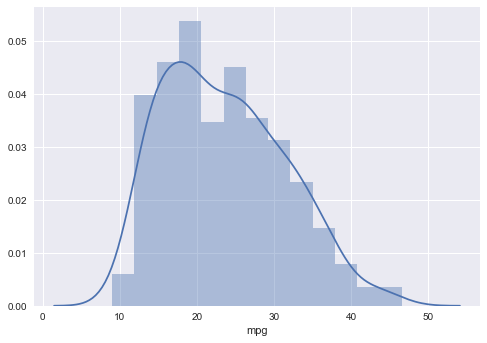

In [16]:
sns.distplot(auto_d["mpg"])
plt.show()

<b>Observation:</b>
The avergae distribution of mpg is ~18.

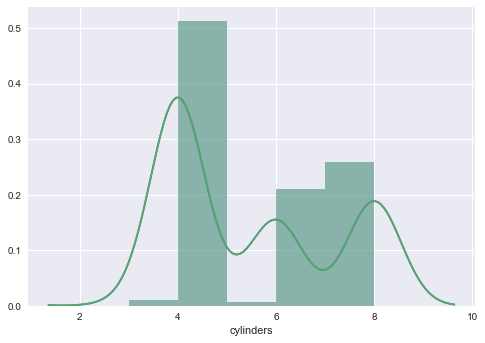

In [132]:
sns.distplot(auto_d.cylinders)
plt.show()

<b>Observation:</b>
The average distribution of cylinders is 4.

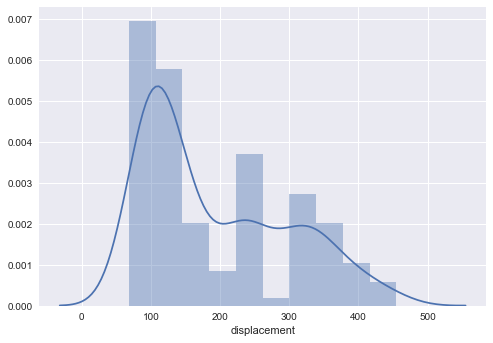

In [133]:
sns.distplot(auto_d.displacement)
plt.show()

<b>Observation:</b>
The average distribution of displacement is ~100.

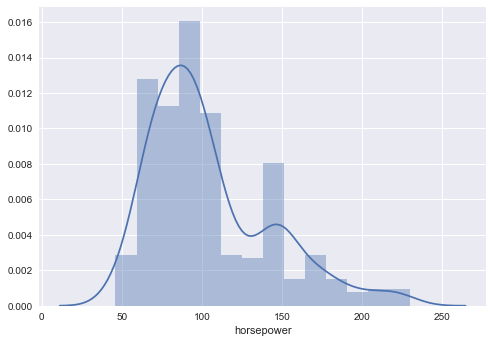

In [134]:
sns.distplot(auto_d.horsepower)
plt.show()

<b>Observation:</b>
The average distribution of horsepower is ~90.

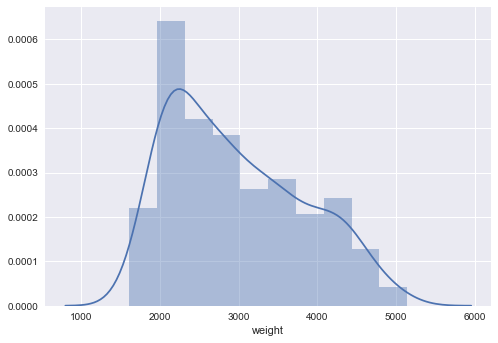

In [135]:
sns.distplot(auto_d.weight)
plt.show()

<b>Observation:</b>
The average distribution of weight is ~2200.

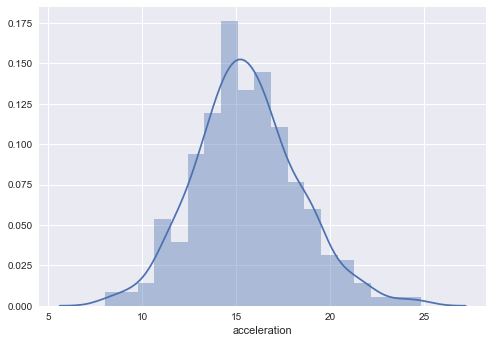

In [136]:
sns.distplot(auto_d.acceleration)
plt.show()

<b>Observation:</b>
The average distribution of acceleration is ~16.

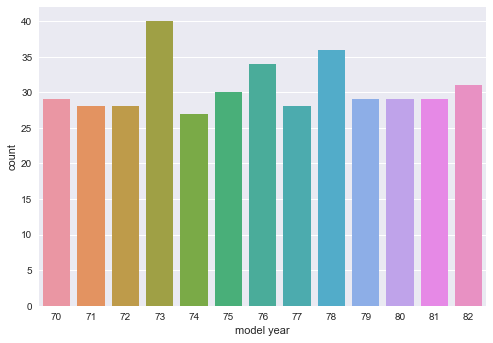

In [138]:
sns.countplot(auto_d["model year"])
plt.show()

<b>Observation:</b>
Most of the models are of year 73.

<b>Bi-Variate Analysis</b>

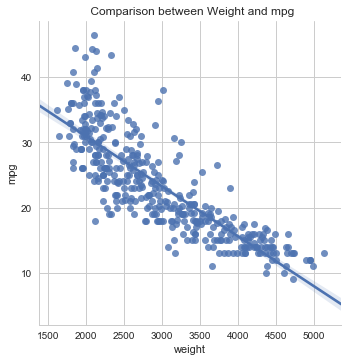

In [162]:
sns.lmplot(x="weight", y="mpg",data=auto_d)
plt.title(" Comparison between Weight and mpg")
plt.show()

<b>Observation:</b>
There is negative correlation between weight and mpg.

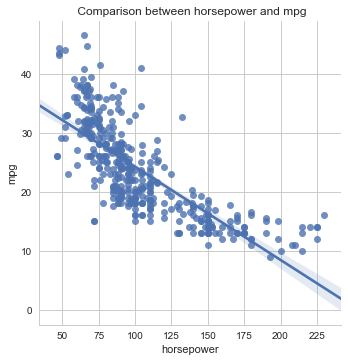

In [163]:
sns.lmplot(x="horsepower", y="mpg",data=auto_d)
plt.title(" Comparison between horsepower and mpg")
plt.show()

<b>Observation:</b>
There is negative correlation between horsepower and mpg.

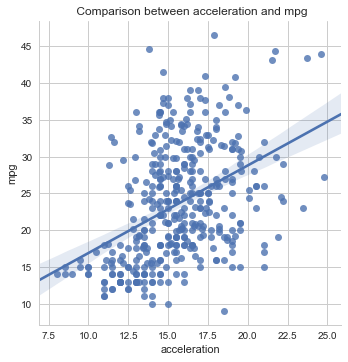

In [165]:
sns.lmplot(x="acceleration", y="mpg",data=auto_d)
plt.title(" Comparison between acceleration and mpg")
plt.show()

<b>Observation:</b>
There is no association between acceleration and mpg.

<b>Summary Statitics</b>

In [30]:
auto_d.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.453535,2.309903,13.438946,10.077312,53.977556,15.521970,75.987374,1.217168
std,7.765204,0.356076,3.637294,1.770591,7.652696,2.686807,3.691570,0.299057
min,9.000000,1.732051,8.246211,6.782330,40.162171,8.000000,70.000000,1.000000
25%,17.375000,2.000000,10.234723,8.717798,47.172554,13.800000,73.000000,1.000000
50%,23.000000,2.000000,12.288206,9.746794,52.948077,15.500000,76.000000,1.000000
75%,29.000000,2.828427,16.224844,11.180340,60.083274,17.025000,79.000000,1.414214
max,46.600000,2.828427,21.330729,15.165751,71.693793,23.700000,82.000000,1.732051


<b>Observations:</b>
<li> horsepower varies from 6 to 15.</li>
<li> model year varies from 70 to 82.</li>

<b>Multi-Variate Analysis</b>

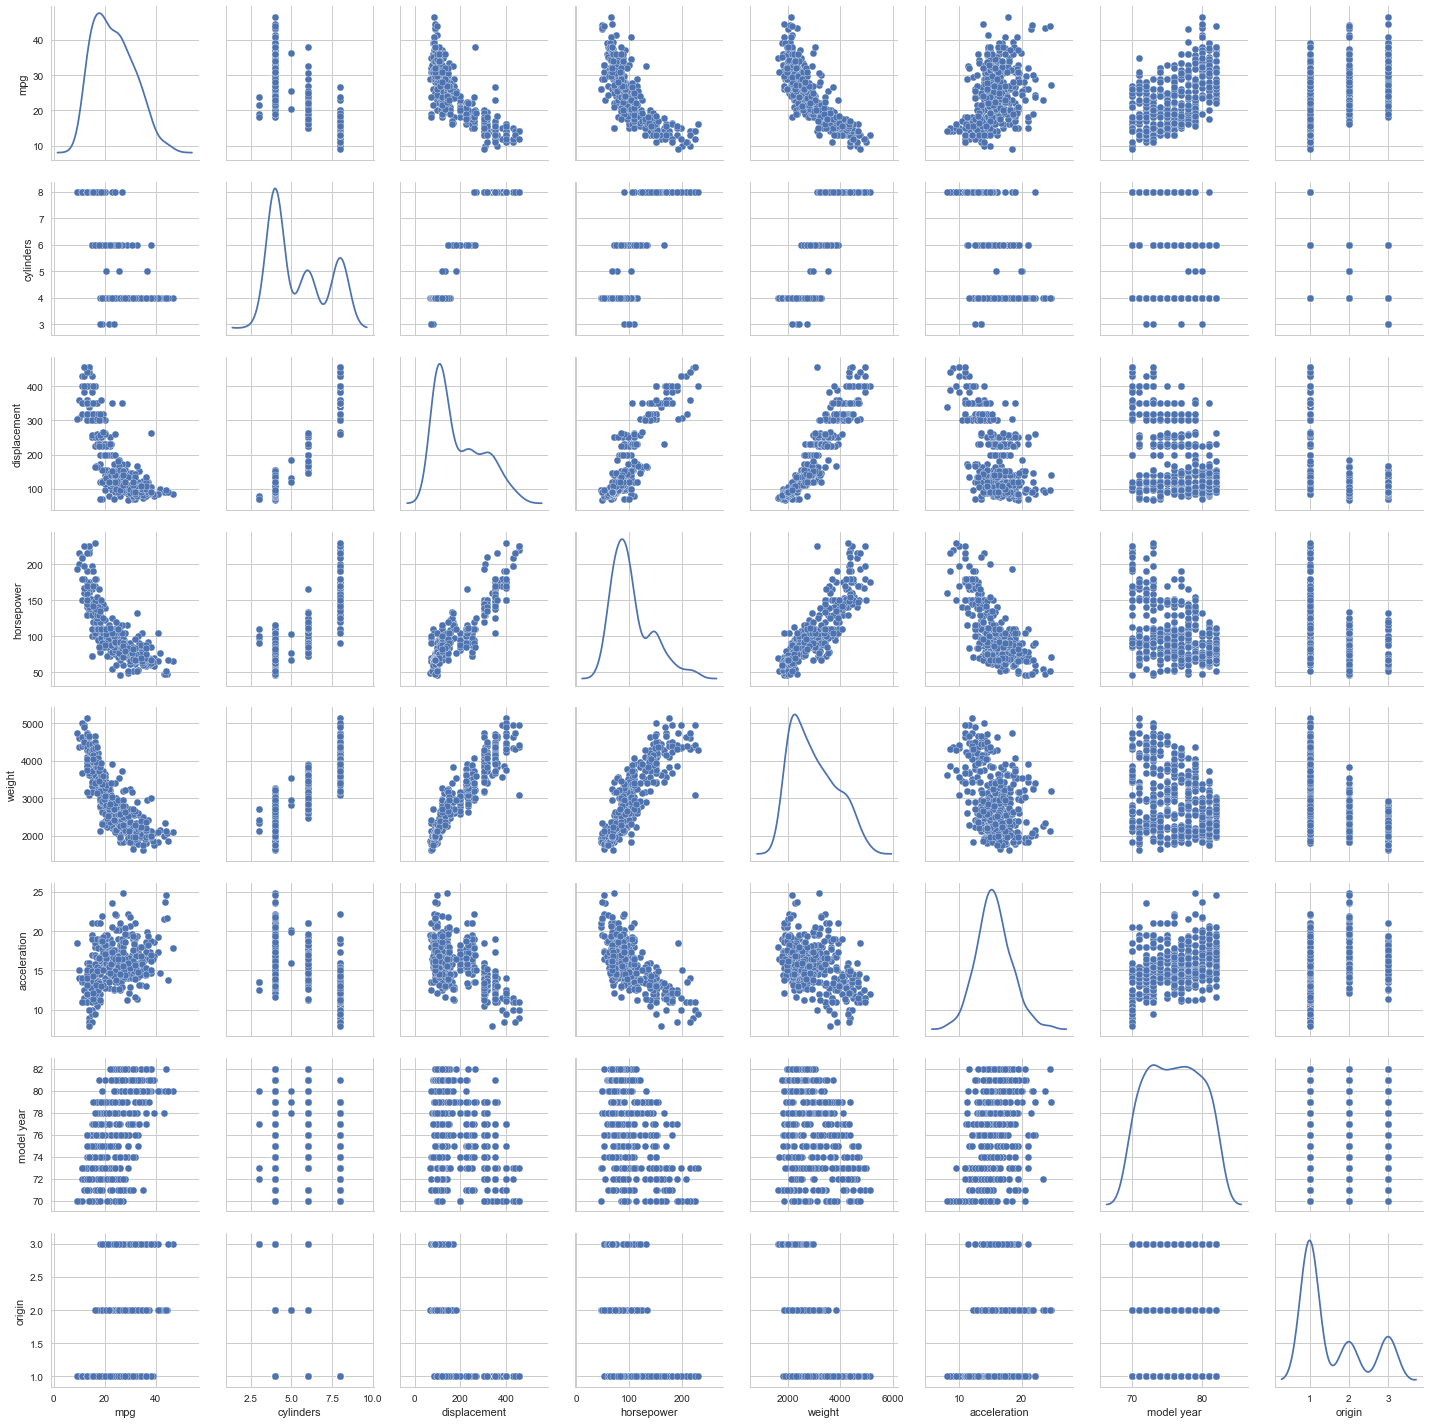

In [173]:
sns.pairplot(auto_d,diag_kind='kde')
plt.show()

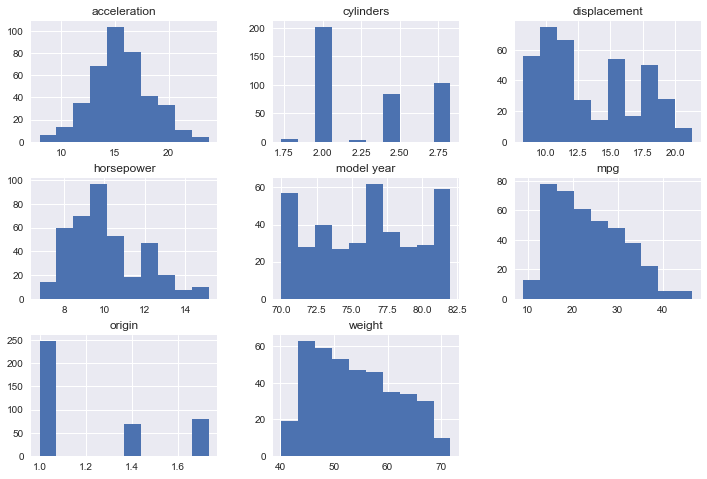

In [29]:
auto_d.hist(figsize=(12,8),bins=10)
plt.show()

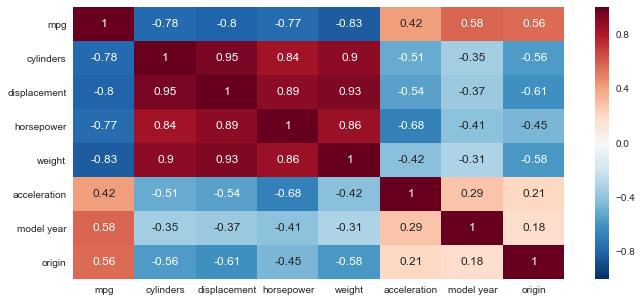

In [70]:
plt.figure(figsize=(11,5))
sns.heatmap(auto_d.corr(),annot=True)
plt.show()

<b>Observations:</b>
<li> There is strong correlation between displacement and cylinders.</li>
<li> There is multicollinearity between horsepower and weight. Removing this two attributes from the dataset. </li>

In [66]:
import warnings
warnings.filterwarnings("ignore")
auto_d.drop(["horsepower", "weight"],axis=1,inplace=True)

<b> Checking Skewness</b>

In [67]:
auto_d.skew(axis=0)

mpg             0.457066
cylinders       0.526922
displacement    0.719645
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [68]:
# Treating the skewness in the dataset
for index in auto_d.skew().index:
    if auto_d.skew().loc[index]>0.5:
        auto_d[index]=np.sqrt(auto_d[index])

In [69]:
auto_d.skew(axis=0)

mpg             0.457066
cylinders       0.448219
displacement    0.469855
acceleration    0.278777
model year      0.011535
origin          0.823555
dtype: float64

In [70]:
z_score=abs(zscore(auto_d))
print("The shape of dataset before removing outliers",auto_d.shape)
auto_d=auto_d.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",auto_d.shape)

The shape of dataset before removing outliers (398, 6)
The shape of dataset after removing outliers (396, 6)


<b> Dividing the input and output variables</b>

In [71]:
X= auto_d.drop(["mpg"],axis=1)
y= auto_d["mpg"]

<b> Standard Scaler</b>

In [72]:
# Lets bring the dataset features into same scale
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b> Splitting the data into train and test</b>

In [73]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [74]:
# We are using R2 score to evaluate
def max_r2_score(models,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),3))

# Machine Learning Models:

As the Target variable is continuous(mpg), its a regression problem, we are implementing Linear Regression, Ridge Regression, Lasso Regression, Gradient Boosting Regressor, Random Forest Regressor, Decision Tree Regressor and XG Boost Regressor.

<b>Linear Regression</b>

In [75]:
Lin=LinearRegression()

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linreg= GridSearchCV(Lin,parameters, cv=5)
Linreg.fit(X,y)
Linreg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [76]:
Lin=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
max_r2_score(Lin,X,y)

Maximum R2_Score corresponding: 94  and it is : 0.824


In [77]:
pred_lin= Lin.predict(X_test)
score_lin= Lin.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((score_lin),3))

The accuracy of the Linear Regression Model is: 0.847


In [78]:
# Cross validation score
mean_lin=cross_val_score(Lin,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Linear Regression:",mean_lin)
std_lin=cross_val_score(Lin,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Linear Regression:",std_lin)

Mean R2 Score for Linear Regression: 0.5303330721172527
Standard Deviation in R2 Score for Linear Regression: 0.32288457468003573


In [79]:
# RMSE
l_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_lin))
l_rmse

3.0393495082668998

<b>Ridge Regression</b>

In [80]:
params={'alpha':[0.01,0.05,0.1,0.5,0.8,1,5,10,15,20]}
rl= Ridge()
rl= GridSearchCV(rl, params, cv=5, verbose=1,scoring="neg_mean_squared_error")
rl.fit(X,y)
rl.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


{'alpha': 20}

In [81]:
rl= Ridge(alpha=0.01)
max_r2_score(rl,X,y)

Maximum R2_Score corresponding: 94  and it is : 0.824


In [82]:
pred_reg= rl.predict(X_test)
score_rl= rl.score(X_test, y_test)
print("The accuracy of the Ridge Regression Model is:",round((score_rl),3))

The accuracy of the Ridge Regression Model is: 0.847


In [83]:
# Cross validation score
mean_rl=cross_val_score(rl,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Ridge Regression:",mean_rl)
std_rl=cross_val_score(rl,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Ridge Regression:",std_rl)

Mean R2 Score for Ridge Regression: 0.5303502123473813
Standard Deviation in R2 Score for Ridge Regression: 0.3228680565440212


In [84]:
# RMSE
rl_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_reg))
rl_rmse

3.039351159699092

<b>Lasso Regression</b>

In [88]:
params={'alpha':[1.0,0.1,0.01,0.001]}
lr= Lasso()
lr= GridSearchCV(lr, params, cv=5, verbose=1,scoring="neg_mean_squared_error")
lr.fit(X,y)
lr.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


{'alpha': 0.1}

In [89]:
lr=Lasso(alpha=0.1)
max_r2_score(lr,X,y)

Maximum R2_Score corresponding: 94  and it is : 0.829


In [90]:
pred_lr= lr.predict(X_test)
score_lr= lr.score(X_test, y_test)
print("The accuracy of the Lasso Regression Model is:",round((score_lr),3))

The accuracy of the Lasso Regression Model is: 0.845


In [91]:
# Cross validation score
mean_lr=cross_val_score(rl,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Lasso Regression:",mean_lr)
std_lr=cross_val_score(rl,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Lasso Regression:",std_lr)

Mean R2 Score for Lasso Regression: 0.5303502123473813
Standard Deviation in R2 Score for Lasso Regression: 0.3228680565440212


In [92]:
# RMSE
lr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_lr))
lr_rmse

3.059547859334149

<b>Gradient Boosting Regressor</b>

In [93]:
gbr = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.02,0.05], 'subsample': [0.3, 0.5,0.7], 'n_estimators': [10,50,100], 'max_depth': [4,6,10]}
gbr= GridSearchCV(estimator=gbr, param_grid= parameters, cv=5, n_jobs=-1)
gbr.fit(X,y)
gbr.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.3}

In [94]:
gbr = GradientBoostingRegressor(learning_rate=0.05,max_depth=6,n_estimators=100,subsample=0.3)
max_r2_score(gbr,X,y)

Maximum R2_Score corresponding: 58  and it is : 0.919


In [95]:
pred_gb= gbr.predict(X_test)
score_gb= gbr.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((score_gb),3))

The accuracy of the Gradient Boosting Regressor Model is: 0.954


In [96]:
# Cross validation score
mean_gbr=cross_val_score(gbr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",mean_gbr)
std_gbr=cross_val_score(gbr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regression:",std_gbr)

Mean R2 Score for Gradient Boosting Regressor: 0.7519230531480368
Standard Deviation in R2 Score for Gradient Boosting Regression: 0.17343297649649084


In [97]:
# RMSE
from sklearn import metrics
gbr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_gb))
gbr_rmse

1.6604029630379835

<b>Random Forest Regressor</b>

In [98]:
rfr=RandomForestRegressor()
param_grid = {
    'max_depth': [60,80, 100],
    'max_features': [2, 3,5],
    'min_samples_leaf': [3, 5,7],
    'min_samples_split': [10, 12,14],
    'n_estimators': [50,100, 500]
}
rfr= GridSearchCV(rfr, param_grid,cv=5)
rfr.fit(X,y)
rfr.best_params_

{'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [99]:
rfr=RandomForestRegressor(max_depth=60,max_features=2,min_samples_leaf=3,min_samples_split=10,n_estimators=50)
max_r2_score(rfr,X,y)

Maximum R2_Score corresponding: 94  and it is : 0.897


In [100]:
pred_rf= rfr.predict(X_test)
score_rf= rfr.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((score_rf),3))

The accuracy of the Random Forest Regressor Model is: 0.916


In [101]:
# Cross validation score
mean_rf=cross_val_score(rfr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",mean_rf)
std_rf=cross_val_score(rfr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_rf)

Mean R2 Score for Random Forest Regressor: 0.6940955098006902
Standard Deviation in R2 Score for Random Forest Regression: 0.22689422129138398


In [102]:
# RMSE
rfr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rfr_rmse

2.258505436916834

<b>Decision Tree Regressor</b>

In [103]:
dr=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
dtr=GridSearchCV(dr,param_grid,cv=10)
dtr.fit(X,y)
dtr.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [104]:
dtr=DecisionTreeRegressor(criterion="mse",max_depth=2,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=10)
max_r2_score(dtr,X,y)

Maximum R2_Score corresponding: 94  and it is : 0.867


In [105]:
pred_dr= dtr.predict(X_test)
score_dt= dtr.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((score_dt),3))

The accuracy of the Decision Tree Model is: 0.852


In [106]:
# Cross validation score
mean_dtr=cross_val_score(dtr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Decision Tree Regressor:",mean_dtr)
std_dtr=cross_val_score(dtr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Decision Tree Regressor:",std_dtr)

Mean R2 Score for Decision Tree Regressor: 0.5740061246293513
Standard Deviation in R2 Score for Decision Tree Regressor: 0.2683546921638386


In [107]:
dtr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_dr))
dtr_rmse

2.991106892115032

<b>XG Boost Regressor</b>

In [108]:
xg= xgb.XGBRegressor(objective="reg:linear",silent=True)
xg.fit(X,y)
max_r2_score(xg,X,y)

Maximum R2_Score corresponding: 53  and it is : 0.915


In [109]:
pred_x= xg.predict(X_test)
score_xg= xg.score(X_test, y_test)
print("The accuracy of the XG Boost Regressor Model is:",round((score_xg),3))

The accuracy of the XG Boost Regressor Model is: 0.944


In [110]:
# Cross validation score
mean_xg=cross_val_score(xg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for XG Boost Regressor:",mean_xg)
std_xg=cross_val_score(xg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for XG Boost Regressor:",std_xg)

Mean R2 Score for XG Boost Regressor: 0.7337160237392248
Standard Deviation in R2 Score for XG Boost Regressor: 0.18596668754714085


In [111]:
# RMSE
from sklearn import metrics
xg_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_x))
xg_rmse

1.8452565782611636

# Evaluation:

In [115]:
#Lets initialise the data frame with columns model and f1_score
table= [["Linear Regression", 0.847179,0.530333,0.322885,3.039350], ["Ridge Regression", 0.847179,0.530350,0.322868,3.039351],["Lasso Regression",0.845141,0.530350,0.322868,3.059548],["Gradient Boosting Regressor", 0.954391,0.751923,0.173433,1.660403],["Random Forest Regressor",0.915615,0.694096,0.226894,2.258505],["Decision Tree Regressor",0.851992,0.574006,0.268355,2.991107],["XG Boost Regressor",0.944,0.733716,0.185967,1.845257]]
comparsion= pd.DataFrame(table, columns=["Model Name", "Accuracy","Mean R2 Score"," Std from mean R2 Score", "RMSE"], index=[1,2,3,4,5,6,7])
comparsion

,Model Name,Accuracy,Mean R2 Score,Std from mean R2 Score,RMSE
1,Linear Regression,0.847179,0.530333,0.322885,3.039350
2,Ridge Regression,0.847179,0.530350,0.322868,3.039351
3,Lasso Regression,0.845141,0.530350,0.322868,3.059548
4,Gradient Boosting Regressor,0.954391,0.751923,0.173433,1.660403
5,Random Forest Regressor,0.915615,0.694096,0.226894,2.258505
6,Decision Tree Regressor,0.851992,0.574006,0.268355,2.991107
7,XG Boost Regressor,0.944000,0.733716,0.185967,1.845257


<b>Observations:</b>
<li> As the target variable(mpg) is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above table, we can conclude that Gradient Boosting Regressor performed well with Lowest RMSE(0.173433) and highest accuracy of 95.43%.</li>

<b>Saving the prediction</b>

As Gradient Boosting regressor performed well, we are saving the prediction.

In [113]:
np.savetxt('Model15.csv',pred_gb,delimiter=',')

In [114]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gbr, 'Project15.pkl')

['Project15.pkl']